In [50]:
pip install pmdarima

In [51]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [52]:
df = pd.read_csv('/content/NYKAA.NS.csv',index_col='Date',parse_dates = True)
df = df.dropna()
print('Shape of data',df.shape)
df.head()

Shape of data (248, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-06-21,233.000000,235.666672,230.000000,232.024994,232.024994,1315524
2022-06-22,231.608337,237.500000,224.216660,225.991669,225.991669,1961436
2022-06-23,226.600006,241.649994,226.600006,238.633331,238.633331,2380770
2022-06-24,241.833328,244.666672,236.933334,239.408340,239.408340,1832178
2022-06-27,244.416672,247.324997,241.866669,245.383331,245.383331,1855644


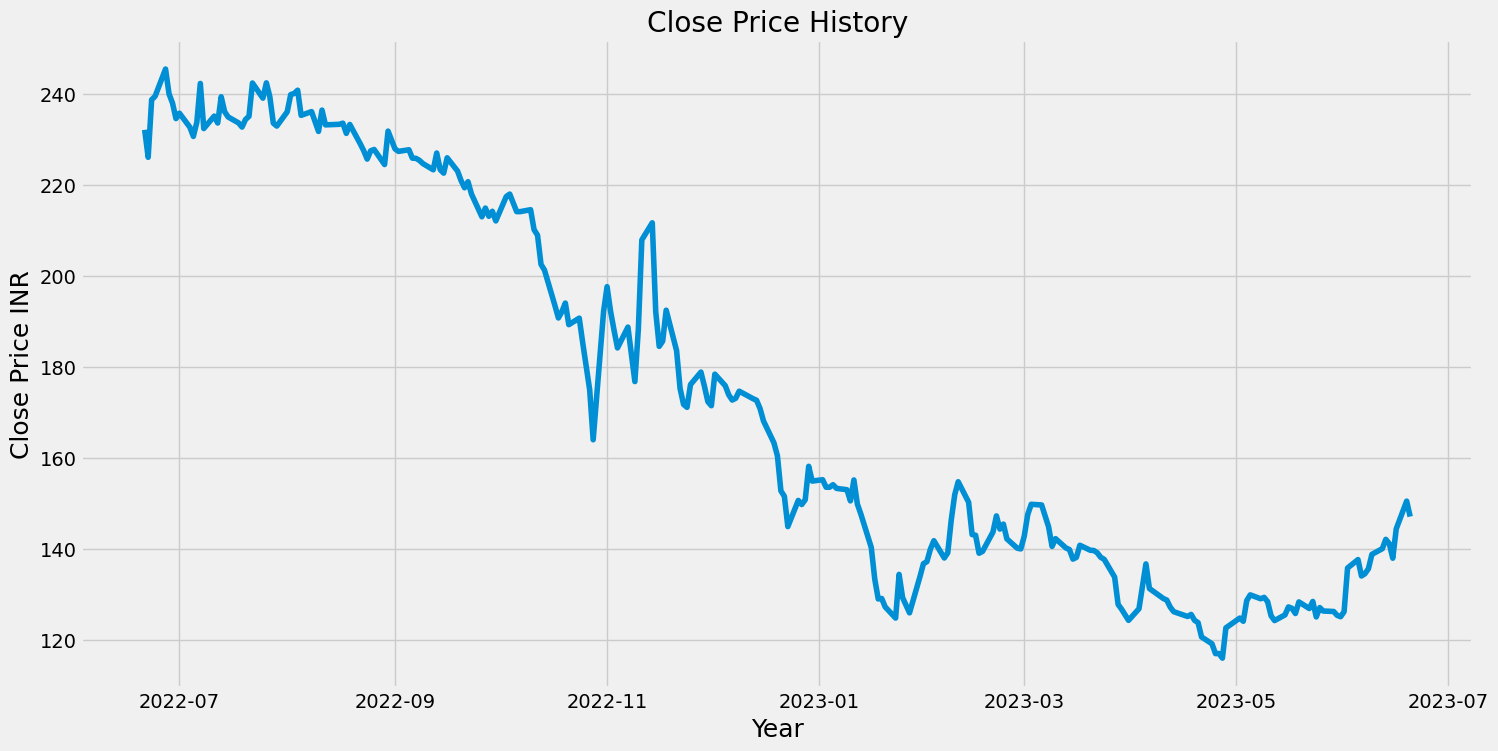

In [53]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close Price INR',fontsize=18)
plt.show()

In [54]:
data = df.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

199

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data =  scaler.fit_transform(dataset)
scaled_data

array([[0.89679369],
       [0.85018031],
       [0.9478496 ],
       [0.95383731],
       [1.        ],
       [0.9578934 ],
       [0.94224833],
       [0.91585118],
       [0.9249936 ],
       [0.90123622],
       [0.88559103],
       [0.90973474],
       [0.97553435],
       [0.89898277],
       [0.9201005 ],
       [0.90838267],
       [0.95293593],
       [0.92756889],
       [0.91861969],
       [0.90857589],
       [0.90149369],
       [0.91437037],
       [0.91977854],
       [0.97624262],
       [0.95055374],
       [0.97656458],
       [0.95287156],
       [0.9081252 ],
       [0.90316772],
       [0.92744016],
       [0.95660571],
       [0.95847283],
       [0.96407422],
       [0.92138808],
       [0.92776211],
       [0.89408966],
       [0.93027303],
       [0.90522795],
       [0.9061937 ],
       [0.9081252 ],
       [0.8908061 ],
       [0.90593611],
       [0.87316505],
       [0.86138296],
       [0.84708985],
       [0.86112549],
       [0.86344319],
       [0.837

In [56]:
train_data  =scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if  i<=61:
    print(x_train)
    print(y_train)
    print()


[array([0.89679369, 0.85018031, 0.9478496 , 0.95383731, 1.        ,
       0.9578934 , 0.94224833, 0.91585118, 0.9249936 , 0.90123622,
       0.88559103, 0.90973474, 0.97553435, 0.89898277, 0.9201005 ,
       0.90838267, 0.95293593, 0.92756889, 0.91861969, 0.90857589,
       0.90149369, 0.91437037, 0.91977854, 0.97624262, 0.95055374,
       0.97656458, 0.95287156, 0.9081252 , 0.90316772, 0.92744016,
       0.95660571, 0.95847283, 0.96407422, 0.92138808, 0.92776211,
       0.89408966, 0.93027303, 0.90522795, 0.9061937 , 0.9081252 ,
       0.8908061 , 0.90593611, 0.87316505, 0.86138296, 0.84708985,
       0.86112549, 0.86344319, 0.83788305, 0.89460472, 0.86447331,
       0.86022411, 0.86292814, 0.8486995 , 0.84844192, 0.84509398,
       0.83962145, 0.82899822, 0.8574556 , 0.82919132, 0.82326809])]
[0.849343292045618]

[array([0.89679369, 0.85018031, 0.9478496 , 0.95383731, 1.        ,
       0.9578934 , 0.94224833, 0.91585118, 0.9249936 , 0.90123622,
       0.88559103, 0.90973474, 0.9755

In [57]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [58]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(139, 60, 1)

In [59]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

In [60]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [61]:
#train model
model.fit(x_train,y_train,batch_size=1,epochs=1)

139/139 [==============================] - 10s 41ms/step - loss: 0.0129


In [62]:
test_data = scaled_data[training_data_len - 60:,:]
x_test=[]
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [63]:
x_test  = np.array(x_test)

In [64]:
x_test= np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [65]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 17ms/step


<ipython-input-66-0a20c252718c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


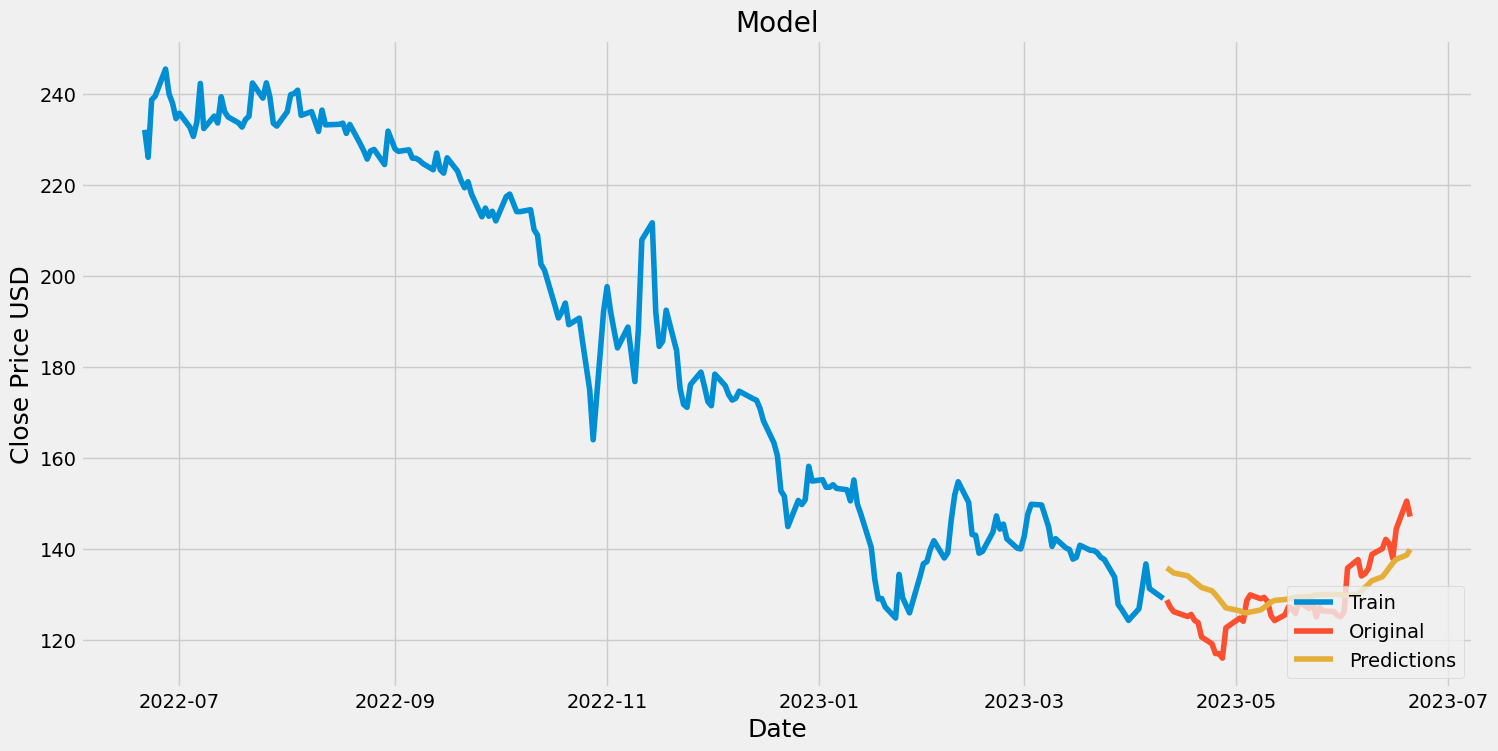

In [66]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Original','Predictions'],loc='lower right')
plt.show()

In [67]:
rmse=np.sqrt(np.mean(predictions - y_test)**2)
rmse

1.8246469602200248